In [76]:
# just a comment
import scipy.io as sio

In [77]:
data = sio.loadmat("/Users/minolidissanayake/Desktop/Keele/Modules/SEM 3/Dataset/Control_part1/v44p.mat")  
eeg_data = data ['v44p']
n_channels = eeg_data.shape[0]
n_time_samples = eeg_data.shape[1]
n_trials = eeg_data[2]

In [78]:
#Process EEG data using MNE library
import mne

#MNE information object creation
sampling_rate = 256  # sampling rate of your data
info = mne.create_info(ch_names=[f"ch_{i + 1}" for i in range(n_channels)],
                       sfreq=sampling_rate,
                       ch_types='eeg')


Creating RawArray with float64 data, n_channels=11393, n_times=19
    Range : 0 ... 18 =      0.000 ...     0.070 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 48 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 48.00 Hz: -6.02, -6.02 dB



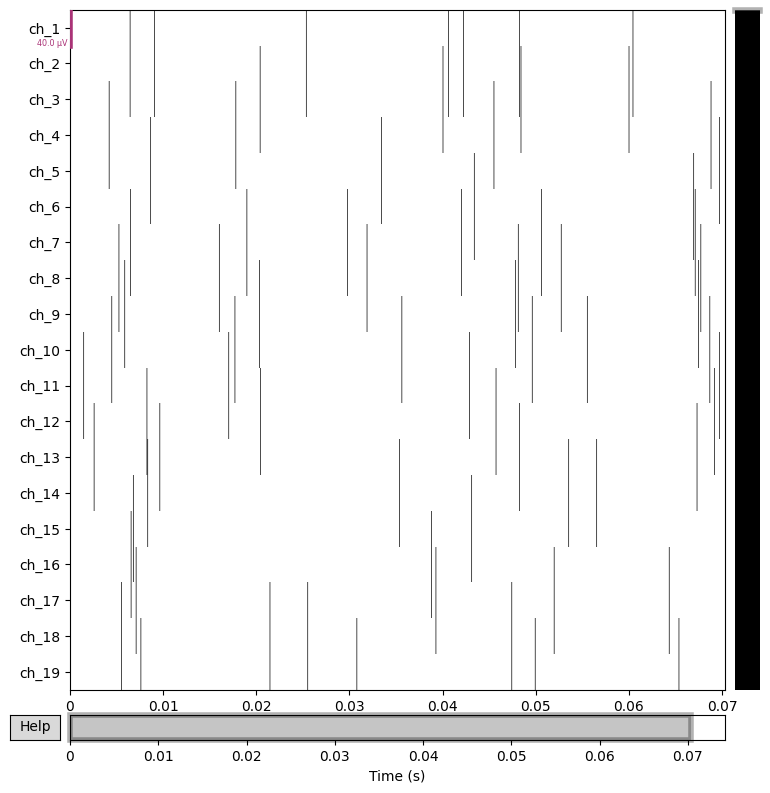

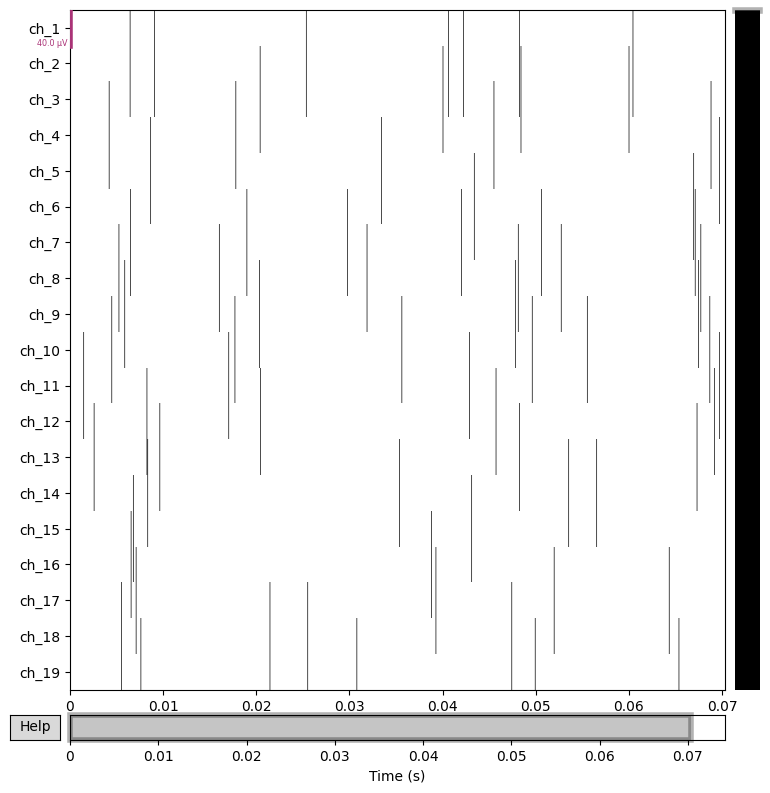

In [92]:
#creating raw mne object
raw = mne.io.RawArray(eeg_data, info)

#Applying a bandpass filter as performed in the study from 1Hz to 48Hz
raw.filter(1, 48, method='iir')

#Plot
raw.plot(duration=60.0, scalings={'eeg': 20e-6}, n_channels=19)
